In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import shapely.wkt
from shapely.geometry import Point, Polygon, MultiPolygon

year = '2006'
file311 = "/content/gdrive/MyDrive/Dataset/311_06.csv"
fileCrime = "/content/gdrive/MyDrive/Dataset/CrimeData.csv"
fileRegions = "/content/gdrive/MyDrive/Dataset/Regions.csv"

data311 = pd.read_csv(file311,low_memory=False)
relevantColumns311 = ['Created Date','Latitude','Longitude','Complaint Type']
relevantComplaints311 = ['Blocked Driveway','Building/Use','Noise','Safety']
finalColumns311 = ['Created Date','Complaint Type','Precincts']
data311 = data311[relevantColumns311]
data311 = data311.loc[(data311['Complaint Type'] == 'Blocked Driveway') | (data311['Complaint Type'] == 'Building/Use') | (data311['Complaint Type'] == 'Noise') | (data311['Complaint Type'] == 'Safety')]
print('Anomalies preprocessed!!!')

crimeData = pd.read_csv(fileCrime, low_memory=False)
relevantColumnsCR = ['CMPLNT_TO_DT','CMPLNT_TO_TM','CMPLNT_FR_DT','RPT_DT','Lat_Lon','Latitude','Longitude','OFNS_DESC']
finalColumnsCR = ['Date','OFNS_DESC','CMPLNT_TO_TM','Longitude','Latitude','Precincts']
relevantCrimesCR = ['ROBBERY', 'BURGLARY', 'FELONY ASSAULT','GRAND LARCENY']
locations = pd.read_csv("/content/gdrive/MyDrive/Dataset/Regions.csv", low_memory=False)
crime2006 = crimeData.loc[crimeData['RPT_DT'].str.endswith(year)]
crime2006 = crime2006[relevantColumnsCR]
crime2006 = crime2006.loc[(crime2006['OFNS_DESC'] == 'ROBBERY') | (crime2006['OFNS_DESC'] == 'BURGLARY') | (crime2006['OFNS_DESC'] == 'FELONY ASSAULT') | (crime2006['OFNS_DESC'] == 'GRAND LARCENY')]
print('Crime Preprocessed!!!')

locations = pd.read_csv(fileRegions, low_memory=False)
precincts = {}
for index, row in locations.iterrows():
  precincts[row['Precinct']] = shapely.wkt.loads(row['the_geom'])

print('Locations loaded!!!')

Anomalies preprocessed!!!
Crime Preprocessed!!!
Locations loaded!!!


In [ ]:
pos = 0
prec = np.ndarray((data311.shape[0],))

for index,row in data311.iterrows():

  poo = Point(row['Longitude'],row['Latitude'])  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")
data311['Precincts'] = prec.astype(int)
print("Done!!")
data311['Precincts'] = data311['Precincts'].astype(np.int64)
data311 = data311[data311['Precincts'] >= 0]
data311 = data311[finalColumns311]

print('Anomaly Preprocessing complete!!!')

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
processed 21000 records!!
processed 22000 records!!
processed 23000 records!!
processed 24000 records!!
processed 25000 records!!
processed 26000 records!!
processed 27000 records!!
processed 28000 records!!
processed 29000 records!!
processed 30000 records!!
processed 31000 records!!
processed 32000 records!!
processed 33000 records!!
processed 34000 records!!
processed 35000 records!!
processed 36000 records!!
processed 37000 records!!
processed 38000 records!!
processed 39000 recor

In [ ]:
pos = 0
prec = np.ndarray((crime2006.shape[0],))
date = np.ndarray((crime2006.shape[0],)).astype(str)

for index,row in crime2006.iterrows():
  
  if not(str(row['CMPLNT_FR_DT']) == 'nan'):
    date[pos] = row['CMPLNT_FR_DT']
  elif not(str(row['CMPLNT_TO_DT']) == 'nan'):
    date[pos] = row['CMPLNT_TO_DT']
  else:
    date[pos] = row['RPT_DT']
  
  poo = Point(row['Longitude'],row['Latitude'])  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")

crime2006['Precincts'] = prec.astype(int)
crime2006['Date'] = date
crime2006 = crime2006[crime2006['Precincts'] >= 0]

print("Done!!")

crime2006 = crime2006[finalColumnsCR]
crime2006.sort_values(['Precincts','Date','OFNS_DESC'],ascending=[True,True,True],inplace=True)
crime2006 = crime2006[crime2006['Date'].str.contains(year)]
crime2006['Precincts'] = crime2006['Precincts'].astype(np.int64)

print('Crime Preprocessing complete!!!')

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
processed 21000 records!!
processed 22000 records!!
processed 23000 records!!
processed 24000 records!!
processed 25000 records!!
processed 26000 records!!
processed 27000 records!!
processed 28000 records!!
processed 29000 records!!
processed 30000 records!!
processed 31000 records!!
processed 32000 records!!
processed 33000 records!!
processed 34000 records!!
processed 35000 records!!
processed 36000 records!!
processed 37000 records!!
processed 38000 records!!
processed 39000 recor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
daterange = pd.date_range(start='01/01/'+year,end='12/31/'+year)
daterange = daterange.strftime('%m/%d/%Y')
daterange = daterange.tolist()

inv_dict = {}
for i in range(len(daterange)):
  inv_dict[daterange[i]] = i

inv_complaints = {}
for i in range(len(relevantComplaints311)):
  inv_complaints[relevantComplaints311[i]] = i

n_precincts = data311['Precincts'].nunique()
uniq_precincts = data311['Precincts'].unique()
inv_prec = {}
for i in range(n_precincts):
  inv_prec[uniq_precincts[i]] = i

inv_crimes = {}
for i in range(len(relevantCrimesCR)):
  inv_crimes[relevantCrimesCR[i]] = i

In [ ]:
matricesCR = [np.zeros((n_precincts,4),dtype=np.int64) for x in range(365)]
exceptions = 0

for idx, row in crime2006.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_dict[row['Date']]
    id3 = inv_crimes[row['OFNS_DESC']]
    matricesCR[id2][id1][id3] = matricesCR[id2][id1][id3] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("Date",id2)
    print("Offense",id3)
    exceptions = exceptions + 1

print ('Created crime matrices!!!')


matrices311 = [np.zeros((n_precincts,4),dtype=np.int64) for x in range(365)]
exceptions = 0

for idx, row in data311.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_dict[str(row['Created Date']).split()[0]]
    id3 = inv_complaints[row['Complaint Type']]
    matrices311[id2][id1][id3] = matrices311[id2][id1][id3] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("Date",id2)
    print("Offense",id3)
    exceptions = exceptions + 1

print('Created anomaly matrices!!!')

Created crime matrices!!!
Created anomaly matrices!!!


In [ ]:
import pickle
output311 = 'matrices311'
outputCrime = 'matricesCR'

file311 = open(output311,'wb')
pickle.dump(matrices311,file311)
fileCR = open(outputCrime,'wb')
pickle.dump(matricesCR,fileCR)

In [ ]:
print(matrices311)

[array([[ 2,  0,  0,  0],
       [ 3,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  1,  1,  0],
       [ 1,  0,  1,  0],
       [ 1,  1,  0,  0],
       [ 8,  1,  1,  0],
       [ 1,  0,  1,  0],
       [ 3,  1,  0,  0],
       [ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 2,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 4,  0,  1,  0],
       [ 5,  0,  2,  0],
       [ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 4,  0,  2,  0],
       [ 2,  1,  0,  0],
       [ 1,  0,  0,  0],
       [ 4,  0,  0,  0],
       [ 0,  0,  1,  0],
       [10,  0,  0,  0],
       [ 5,  0,  1,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  1,  0],
       [ 5,  0,  0,  0],
       [ 5,  0,  2,  0],
       [ 3,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 8,  1,  0,  0],
       [13,  0,  0,  0],
       [ 5,  0,  1,  0],
       [ 0,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 3,  0,  0,  0],
       [ 1,  1,  0,  0],
       [ 0,  0,  1,  0],

In [ ]:
print(matricesCR)

[array([[ 0,  0,  0,  1],
       [ 1,  0,  1,  2],
       [ 1,  0,  0,  4],
       [ 2,  1,  1,  6],
       [ 1,  1,  0,  4],
       [ 1,  2,  1,  0],
       [ 1,  0,  1,  4],
       [ 1,  0,  1,  2],
       [ 1,  2,  3,  4],
       [ 0,  0,  0,  4],
       [ 3,  0,  0,  1],
       [ 0,  1,  0,  1],
       [ 0,  0,  0,  3],
       [ 0,  0,  0,  3],
       [ 0,  2,  0,  0],
       [ 0,  0,  1,  3],
       [ 1,  0,  1,  0],
       [ 1,  0,  0,  2],
       [ 0,  1,  5,  0],
       [ 0,  1,  0,  2],
       [ 0,  1,  0,  3],
       [ 0,  0,  1,  2],
       [ 2,  1,  0,  2],
       [ 0,  2,  1,  7],
       [ 1,  2,  3,  0],
       [ 2,  3,  2,  1],
       [ 0,  0,  1,  1],
       [ 0,  0,  2,  5],
       [ 0,  0,  1,  5],
       [ 1,  1,  2,  0],
       [ 0,  2,  1,  5],
       [ 3,  1,  0,  1],
       [ 2,  0,  5,  3],
       [ 0,  2,  0,  1],
       [ 0,  0,  2,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  4],
       [ 2,  0,  2,  0],
       [ 2,  2,  3,  0],
       [ 0,  1,  2, 11],

In [ ]:
import pandas as pd
import numpy as np
import shapely.wkt
from shapely.geometry import Point, Polygon, MultiPolygon
import re

filePOI = '/content/gdrive/MyDrive/Dataset/Point_Of_Interest.csv'
fileRegions = "/content/gdrive/MyDrive/Dataset/Regions.csv"

poi = pd.read_csv(filePOI,low_memory=False)
locations = pd.read_csv(fileRegions, low_memory=False)

relevantColumns = ['the_geom','CREATED','FACILITY_T']
finalColumns = ['Precincts','FACILITY_T']
poi = poi[relevantColumns]
precincts = {}
for index, row in locations.iterrows():
  precincts[row['Precinct']] = shapely.wkt.loads(row['the_geom'])

In [ ]:
lat = []
longt = []
date = []

for idx,row in poi.iterrows():
  location = re.split(r' |\)|\(' ,row['the_geom'])
  year = int(row['CREATED'].split()[0].split('/')[-1])
  lat = lat + [location[-2]]
  longt = longt + [location[2]]
  date = date + [year]

poi['Year'] = date
poi['Latitude'] = lat
poi['Longitude'] = longt
pos = 0
prec = np.ndarray((poi.shape[0],))

for index,row in poi.iterrows():

  poo = Point(float(row['Longitude']),float(row['Latitude']))  
  for key,val in precincts.items():
    if poo.within(val):
      prec[pos] = key
      break

  pos=pos+1
  if(pos%1000 == 0):
    print ("processed "+str(pos)+" records!!")
    
poi['Precincts'] = prec.astype(int)
print("Done!!")

poi['Precincts'] = poi['Precincts'].astype(np.int64)
poi = poi[poi['Precincts'] >= 0]
inv_categories = {}
n_categories = poi['FACILITY_T'].nunique()
uniq_categories = poi['FACILITY_T'].unique()
for i in range(n_categories):
  inv_categories[uniq_categories[i]] = i

n_precincts = poi['Precincts'].nunique()
uniq_precincts = poi['Precincts'].unique()
inv_prec = {}
for i in range(n_precincts):
  inv_prec[uniq_precincts[i]] = i

poi = poi[poi['Year'] <= 2008]
poi = poi[finalColumns]

processed 1000 records!!
processed 2000 records!!
processed 3000 records!!
processed 4000 records!!
processed 5000 records!!
processed 6000 records!!
processed 7000 records!!
processed 8000 records!!
processed 9000 records!!
processed 10000 records!!
processed 11000 records!!
processed 12000 records!!
processed 13000 records!!
processed 14000 records!!
processed 15000 records!!
processed 16000 records!!
processed 17000 records!!
processed 18000 records!!
processed 19000 records!!
processed 20000 records!!
Done!!


In [ ]:
matrices = np.zeros((n_precincts,n_categories),dtype=np.int64)
exceptions = 0

for idx, row in poi.iterrows():
  try:
    id1 = inv_prec[row['Precincts']]
    id2 = inv_categories[row['FACILITY_T']]
    matrices[id1][id2]= matrices[id1][id2] + 1
  except:
    print("Exception!!!")
    print("Precincts",id1)
    print("FACILITY_T",id2)
    exceptions = exceptions + 1

In [ ]:
import pickle

outputPOI = 'poiMatrices'
file = open(outputPOI,'wb')
pickle.dump(matrices,file)


In [ ]:
pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7 MB 34 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 367 kB 69.0 MB/s 
     |████████████████████████████████| 3.2 MB 47.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following d

In [ ]:
import numpy as np
import pandas as pd
import time
import pickle

from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn as bi_rnn
from tensorflow.contrib.rnn import BasicLSTMCell

import tensorflow as tf
tf.disable_v2_behavior()

from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
input311File = 'matrices311'
inputCrimeFile = 'matricesCR'

with open(inputCrimeFile, 'rb') as pickle_file:
    anomaly = pickle.load(pickle_file)

with open(inputCrimeFile,'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [ ]:
print(anomaly)

[array([[ 0,  0,  0,  1],
       [ 1,  0,  1,  2],
       [ 1,  0,  0,  4],
       [ 2,  1,  1,  6],
       [ 1,  1,  0,  4],
       [ 1,  2,  1,  0],
       [ 1,  0,  1,  4],
       [ 1,  0,  1,  2],
       [ 1,  2,  3,  4],
       [ 0,  0,  0,  4],
       [ 3,  0,  0,  1],
       [ 0,  1,  0,  1],
       [ 0,  0,  0,  3],
       [ 0,  0,  0,  3],
       [ 0,  2,  0,  0],
       [ 0,  0,  1,  3],
       [ 1,  0,  1,  0],
       [ 1,  0,  0,  2],
       [ 0,  1,  5,  0],
       [ 0,  1,  0,  2],
       [ 0,  1,  0,  3],
       [ 0,  0,  1,  2],
       [ 2,  1,  0,  2],
       [ 0,  2,  1,  7],
       [ 1,  2,  3,  0],
       [ 2,  3,  2,  1],
       [ 0,  0,  1,  1],
       [ 0,  0,  2,  5],
       [ 0,  0,  1,  5],
       [ 1,  1,  2,  0],
       [ 0,  2,  1,  5],
       [ 3,  1,  0,  1],
       [ 2,  0,  5,  3],
       [ 0,  2,  0,  1],
       [ 0,  0,  2,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  4],
       [ 2,  0,  2,  0],
       [ 2,  2,  3,  0],
       [ 0,  1,  2, 11],

In [ ]:
print(content)

[array([[ 0,  0,  0,  1],
       [ 1,  0,  1,  2],
       [ 1,  0,  0,  4],
       [ 2,  1,  1,  6],
       [ 1,  1,  0,  4],
       [ 1,  2,  1,  0],
       [ 1,  0,  1,  4],
       [ 1,  0,  1,  2],
       [ 1,  2,  3,  4],
       [ 0,  0,  0,  4],
       [ 3,  0,  0,  1],
       [ 0,  1,  0,  1],
       [ 0,  0,  0,  3],
       [ 0,  0,  0,  3],
       [ 0,  2,  0,  0],
       [ 0,  0,  1,  3],
       [ 1,  0,  1,  0],
       [ 1,  0,  0,  2],
       [ 0,  1,  5,  0],
       [ 0,  1,  0,  2],
       [ 0,  1,  0,  3],
       [ 0,  0,  1,  2],
       [ 2,  1,  0,  2],
       [ 0,  2,  1,  7],
       [ 1,  2,  3,  0],
       [ 2,  3,  2,  1],
       [ 0,  0,  1,  1],
       [ 0,  0,  2,  5],
       [ 0,  0,  1,  5],
       [ 1,  1,  2,  0],
       [ 0,  2,  1,  5],
       [ 3,  1,  0,  1],
       [ 2,  0,  5,  3],
       [ 0,  2,  0,  1],
       [ 0,  0,  2,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  4],
       [ 2,  0,  2,  0],
       [ 2,  2,  3,  0],
       [ 0,  1,  2, 11],

In [ ]:
dat = []
dat2 = []
for i in range(len(content)):
  a = []
  b = []
  for j in range(77):
    a.extend(content[i][j+1])
    b.extend(anomaly[i][j+1])
    # print(a)
  dat.append(a)
  dat2.append(b)

inp = np.array(dat)
inp1 = np.where(inp>0,1,0)
inp = np.array(dat)
inp1 = np.where(inp>0,1,0)
inpA = np.array(dat2)
inpA = np.array(dat2)

In [ ]:
size = int(len(inp)*0.8)
x_train = inp[:size]
y_train = inp1[:size]
x_test = inp[size:]
y_test = inp1[size:]
x_train2 = inpA[:size]
x_test2 = inpA[size:]

In [ ]:
def attention(inputs, attention_size, time_major=False, return_alphas=False):
  
    if isinstance(inputs, tuple):
        inputs = tf.concat(inputs, 2)

    if time_major:
        inputs = tf.array_ops.transpose(inputs, [1, 0, 2])

    hidden_size = inputs.shape[2].value 
    w_omega = tf.Variable(tf.random_normal([hidden_size, attention_size], stddev=0.1))
    b_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))
    u_omega = tf.Variable(tf.random_normal([attention_size], stddev=0.1))

    with tf.name_scope('v'):
        v = tf.tanh(tf.tensordot(inputs, w_omega, axes=1) + b_omega)
    vu = tf.tensordot(v, u_omega, axes=1, name='vu')  # (B,T) shape
    alphas = tf.nn.softmax(vu, name='alphas')  # (B,T) shape
    output = tf.reduce_sum(inputs * tf.expand_dims(alphas, -1), 1)

    if not return_alphas:
        return output
    else:
        return output, alphas

In [ ]:
def split_dataset(x_test, y_test, dev_ratio):
    test_size = len(x_test)
    print(test_size)
    dev_size = (int)(test_size * dev_ratio)
    print(dev_size)
    x_dev = x_test[:dev_size]
    x_test = x_test[dev_size:]
    y_dev = y_test[:dev_size]
    y_test = y_test[dev_size:]
    return x_test, x_dev, y_test, y_dev, dev_size, test_size - dev_size


def fill_feed_dict(data_X, data_Y, batch_size):
    shuffled_X, shuffled_Y = shuffle(data_X, data_Y)
    for idx in range(data_X.shape[0] // batch_size):
        x_batch = shuffled_X[batch_size * idx: batch_size * (idx + 1)]
        y_batch = shuffled_Y[batch_size * idx: batch_size * (idx + 1)]
        yield x_batch, y_batch

In [ ]:
MAX_DOCUMENT_LENGTH = 128
EMBEDDING_SIZE = 128
HIDDEN_SIZE = 64
ATTENTION_SIZE = 64
lr = 1e-4
learning_rate=0.001
hidden_dim = 250
BATCH_SIZE = 4
KEEP_PROB = 1.0
LAMBDA = 0.0001
MAX_LABEL = 77*4
epochs = 10
latent_dim = 8
timeSize = 10
max_len=10

In [ ]:
def multi_label_hot(prediction, threshold=0.5):
    prediction = tf.cast(prediction, tf.float32)
    threshold = float(threshold)
    return tf.cast(tf.greater(prediction, threshold), tf.int64)

def get_metrics(labels_tensor, one_hot_prediction, num_classes):
    metrics = {}
    with tf.variable_scope("metrics"):
        for scope in ["train", "val"]:
            with tf.variable_scope(scope):
                with tf.variable_scope("accuracy"):
                    accuracy, accuracy_update = tf.metrics.accuracy(
                        tf.cast(one_hot_prediction, tf.int32),
                        labels_tensor,
                    )
                metrics[scope] = {
                    "accuracy": accuracy,
                    "updates": tf.group(accuracy_update),
                }
    return metrics

In [ ]:
# Bi-LSTM based architecture with Attention
# https://github.com/TobiasLee/Text-Classification

tf.reset_default_graph()
batch_x = tf.placeholder(tf.float32, [None,timeSize,MAX_LABEL])
anomaly_x = tf.placeholder(tf.float32, [None,timeSize,MAX_LABEL])
batch_y = tf.placeholder(tf.float32, [None, MAX_LABEL])
keep_prob = tf.placeholder(tf.float32)

rnn_outputs1, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=batch_x, dtype=tf.float32,scope='BLSTM_1')
fw_outputs1, bw_outputs1 = rnn_outputs1

rnn_outputs2, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=anomaly_x, dtype=tf.float32,scope='BLSTM_2')
fw_outputs2, bw_outputs2 = rnn_outputs2

# weights for balance outs
weight_out = tf.Variable(tf.truncated_normal([4], stddev=0.1))
weight_soft = tf.nn.softmax(weight_out)

inputAdd = weight_soft[0]*fw_outputs1 + weight_soft[1]**fw_outputs2 + weight_soft[2]*bw_outputs1 + weight_soft[3]*bw_outputs2
print("batch_x = ",batch_x.shape)
print("anomaly_x = ",anomaly_x.shape)


print(inputAdd.shape)
rnn_outputs, _ = bi_rnn(BasicLSTMCell(HIDDEN_SIZE),
                        BasicLSTMCell(HIDDEN_SIZE),
                        inputs=inputAdd, dtype=tf.float32,scope='BLSTM_3')
fw_outputs, bw_outputs = rnn_outputs
print("inputAdd = ",inputAdd.shape)

# # Attention
attention_output, alphas = attention(rnn_outputs, ATTENTION_SIZE, return_alphas=True)
drop = tf.nn.dropout(attention_output, keep_prob)
shape = drop.get_shape()
print("attention_output = ",shape)
# # Fully connected layer（dense layer)
# W = tf.Variable(tf.truncated_normal([shape[1].value, MAX_LABEL], stddev=0.1))
# b = tf.Variable(tf.constant(0., shape=[MAX_LABEL]))
# y_hat = tf.nn.xw_plus_b(drop, W, b)
W = tf.Variable(tf.random_normal([HIDDEN_SIZE], stddev=0.1))
H = fw_outputs + bw_outputs  # (batch_size, seq_len, HIDDEN_SIZE)
M = tf.tanh(H)  # M = tanh(H)  (batch_size, seq_len, HIDDEN_SIZE)

alpha = tf.nn.softmax(tf.reshape(tf.matmul(tf.reshape(M, [-1, HIDDEN_SIZE]),
                                                tf.reshape(W, [-1, 1])),
                                      (-1, timeSize )))  # batch_size x seq_len

print("ALPHA = ",alpha.shape)
r = tf.matmul(tf.transpose(H, [0, 2, 1]),
              tf.reshape(alpha, [-1, timeSize, 1]))
r = tf.squeeze(r)
h_star = tf.tanh(r)  # (batch , HIDDEN_SIZE

h_drop = tf.nn.dropout(h_star, keep_prob)
shape = h_drop.get_shape()
# print(h_star.shape)
# Fully connected layer（dense layer)
FC_W = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, MAX_LABEL], stddev=0.1))
FC_b = tf.Variable(tf.constant(0., shape=[MAX_LABEL]))
y_hat2 = tf.nn.xw_plus_b(h_drop, FC_W, FC_b)
print(y_hat2.shape)
FC_W2 = tf.Variable(tf.truncated_normal([MAX_LABEL, MAX_LABEL], stddev=0.1))
FC_b2 = tf.Variable(tf.constant(0., shape=[MAX_LABEL]))
y_hat = tf.nn.xw_plus_b(y_hat2, FC_W2, FC_b2)

# ######## LOSS FUNCTIONS ######

# This loss function is used to predict the actual number of crime occurences, hence the L2 loss
loss =  tf.nn.l2_loss(y_hat-batch_y) +0.001*tf.nn.l2_loss(FC_W)+0.001*tf.nn.l2_loss(FC_W2) + 0.0001*tf.nn.l2_loss(W)

# Uncomment this, if you just want the binary predictions, not actual crime numbers
# loss =   tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=batch_y)) +0.001*tf.nn.l2_loss(FC_W)+0.001*tf.nn.l2_loss(FC_W2) + 0.0001*tf.nn.l2_loss(W)

# ######## LOSS FUNCTIONS ######

optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

# optimization
# loss_to_minimize = loss
# tvars = tf.trainable_variables()
# gradients = tf.gradients(loss_to_minimize, tvars, aggregation_method=tf.AggregationMethod.EXPERIMENTAL_TREE)
# grads, global_norm = tf.clip_by_global_norm(gradients, 1.0)

# global_step = tf.Variable(0, name="global_step", trainable=False)
# optimizer = tf.train.AdamOptimizer(learning_rate=lr)
# train_op = optimizer.apply_gradients(zip(grads, tvars), global_step=global_step,
#                                                 name='train_step')

# Accuracy metric
prediction = tf.argmax(tf.nn.softmax(y_hat), 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(batch_y, 1)), tf.float32))

prediction = tf.sigmoid(y_hat)
one_hot_prediction = multi_label_hot(prediction)

accuracy  =  get_metrics(batch_y,one_hot_prediction,77)

batch_x =  (?, 10, 308)
anomaly_x =  (?, 10, 308)
(?, 10, 64)
inputAdd =  (?, 10, 64)
attention_output =  (?, 128)
ALPHA =  (?, 10)
(?, 308)


In [ ]:
saver = tf.train.Saver()
!mkdir checkpointDir
slim = tf.contrib.slim
sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)
    
model_summary()
tr = []
ts = []

---------
Variables: name (type shape) [size]
---------
BLSTM_1/fw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_1/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_1/bw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_1/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_2/fw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_2/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_2/bw/basic_lstm_cell/kernel:0 (float32_ref 372x256) [95232, bytes: 380928]
BLSTM_2/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
Variable:0 (float32_ref 4) [4, bytes: 16]
BLSTM_3/fw/basic_lstm_cell/kernel:0 (float32_ref 128x256) [32768, bytes: 131072]
BLSTM_3/fw/basic_lstm_cell/bias:0 (float32_ref 256) [256, bytes: 1024]
BLSTM_3/bw/basic_lstm_cell/kernel:0 (float32_ref 128x256) [32768, bytes: 131072]
BLSTM_3/bw/basic_lstm_cell/bias:0 (float32_ref 256) [256, byt

In [ ]:
#sess.run(tf.global_variables_initializer())
print("Initialized! ")
target_names = ['a','b','c','d']
print("Start trainning")
start = time.time()

testA = 0
predsAr = []

# Training for 50 epochs
for e in range(50):

    epoch_start = time.time()
    print("Epoch %d start !" % (e + 1))
    # for x_batch, y_batch in zip(x_train, y_train, BATCH_SIZE):
    err = []
    preds = []
    trues = []

    # batch sizes for crimes and anomaly and prediction
    x_batch1 =[]
    x_batch2 = []
    y_batch1 = []
    
    # Recording error, prediction, truth values(for F1-scores)
    for i in range(len(x_train)-80):
        i+=80
        x_batch = x_train[i:min(len(x_train)-1,timeSize+(i))]
        x_anomaly = x_train2[i:min(len(x_train)-1,timeSize+(i))]
        if len(x_batch) < timeSize:
          continue
        x_batch = x_batch
        x_anomaly = x_anomaly
        y_batch = x_train[min(len(x_train)-1,timeSize+(i))].T
        x_batch1.append(x_batch)
        x_batch2.append(x_anomaly)
        y_batch1.append(y_batch)
        if (i+1)% BATCH_SIZE >0:
          continue
        # print(np.array(x_batch1).shape)
        fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
        # print(y_batch)
        l, _, oht = sess.run([loss, optimizer, one_hot_prediction], feed_dict=fd)
        for j in range(BATCH_SIZE):
          # print(oht.shape)
          preds.extend(np.array(oht[j]).reshape(-1,4))
          trues.extend(np.array(y_batch1[j]).reshape(-1,4))
        x_batch1 =[]
        y_batch1 = []
        x_batch2 = []

        # sess.run(optimizer,feed_dict=fd)
        err.append(l)
    # print(sess.run(loss))
    epoch_finish = time.time()
    # print(preds)
    preds = np.array(preds)
    trues = np.array(trues)
    # f1 = f1_score(y_true=y_batch, y_pred=oht, average='weighted')
    f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
    f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
    tr.append([f1,f2])
    # print(f1)
    print("TRain :: ",np.mean(err)," : micro ",f1," : macro",f2," : ",epoch_finish-epoch_start)
    # print(classification_report(y_true=trues,y_pred=preds,target_names=target_names))

    # Predictions on test data and storing info for visualization
    if True:
      preds = []
      trues = []
      x_batch1 =[]
      y_batch1 = []
      x_batch2 = []
      err = []
      for i in range(len(x_test)):
          # i+=100
          x_batch = x_test[i:min(len(x_test)-1,timeSize+(i))]
          x_anomaly = x_test2[i:min(len(x_test)-1,timeSize+(i))]
          if len(x_batch) < timeSize:
            continue
          x_batch = x_batch
          x_anomaly = x_anomaly
          y_batch = x_test[min(len(x_test)-1,timeSize+(i))].T
          x_batch1.append(x_batch)
          x_batch2.append(x_anomaly)
          y_batch1.append(y_batch)
          if (i+1)% BATCH_SIZE >0:
            continue
          fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
          l, acc,oht,weightSupport = sess.run([loss, accuracy,one_hot_prediction,weight_soft], feed_dict=fd)
          err.append(l)
          sess.run(optimizer,feed_dict=fd)
          for j in range(BATCH_SIZE):
            # print(oht.shape)
            preds.extend(np.array(oht[j]).reshape(-1,4))
            trues.extend(np.array(y_batch1[j]).reshape(-1,4))

          x_batch1 =[]
          y_batch1 = []
          x_batch2 = []

      # print(preds)
      preds = np.array(preds)
      trues = np.array(trues)
      # f1 = f1_score(y_true=y_batch, y_pred=oht, average='weighted')
      f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
      f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
      if testA < f1:
        testA=f1
        save_path = saver.save(sess, "./modelM/model"+str(f1)[:5]+".ckpt")
        # print(classification_report(y_true=trues,y_pred=preds,target_names=target_names))
        predsAr.append(preds)
      ts.append([f1,f2])
      # print(f1)
      print(np.mean(err)," : micro ",f1," : macro",f2," : ")
      print(weightSupport)
      # print(classification_report(y_true=trues,y_pred=preds,target_names=target_names))

Initialized! 
Start trainning
Epoch 1 start !
TRain ::  1299.9546  : micro  0.6254142774475248  : macro 0.6130950768641712  :  7.29764723777771
1033.8148  : micro  0.6778692530356002  : macro 0.6673271066283714  : 
[0.24653864 0.22782749 0.24359618 0.28203768]
Epoch 2 start !
TRain ::  773.3429  : micro  0.680787964065375  : macro 0.6739705686086384  :  7.610197067260742
723.13794  : micro  0.6865384615384615  : macro 0.6785596171684372  : 
[0.24690448 0.22634205 0.24412026 0.28263322]
Epoch 3 start !
TRain ::  685.69666  : micro  0.6799871161692076  : macro 0.6736115377442751  :  6.275451898574829
683.6096  : micro  0.6864895662702086  : macro 0.6784916114169526  : 
[0.24692541 0.22613755 0.24421188 0.28272513]
Epoch 4 start !
TRain ::  680.64185  : micro  0.6801327276827422  : macro 0.673758718773454  :  6.171367883682251
676.78485  : micro  0.6864630064800968  : macro 0.6784650352629423  : 
[0.24690679 0.22614211 0.24421993 0.28273118]
Epoch 5 start !
TRain ::  677.867  : micro  0.6

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
preds = []
trues = []
x_batch1 =[]
y_batch1 = []
x_batch2 = []
err = []
pp = []
x_test3 = np.array(x_test)
sub=0
for i in range(len(x_test)):
    i-=sub
    x_batch = x_test3[i:min(len(x_test)-1,timeSize+(i))]
    x_anomaly = x_test2[i:min(len(x_test)-1,timeSize+(i))]
    if len(x_batch) < timeSize:
      continue
    x_batch = x_batch
    x_anomaly = x_anomaly
    y_batch = x_test[min(len(x_test)-1,timeSize+(i))].T
    x_batch1.append(x_batch)
    x_batch2.append(x_anomaly)
    y_batch1.append(y_batch)
    if (i+1)% BATCH_SIZE >0:
      continue
      sub=3
    fd = {batch_x: x_batch1,anomaly_x:x_batch2, batch_y: y_batch1, keep_prob: KEEP_PROB}
    l, acc,oht,weightSupport = sess.run([loss, accuracy,one_hot_prediction,weight_soft], feed_dict=fd)
    err.append(l)
   
    for j in range(1):
      preds.extend(np.array(oht[j]).reshape(-1,4))
      trues.extend(np.array(y_batch1[j]).reshape(-1,4))
    f1 = f1_score(y_true=np.where(np.array(trues)>0,1,0), y_pred=np.where(np.array(preds)>0,1,0), average='micro')
    f2 = f1_score(y_true=np.where(np.array(trues)>0,1,0), y_pred=np.where(np.array(preds)>0,1,0), average='macro')
    print(f1," : ",f2)
    pp.append([f1,f2])
    x_batch1 =[]
    y_batch1 = []
    x_batch2 = []
    x_test3[min(len(x_test)-1,timeSize+(i-3))]=np.array(oht[0]).T

preds = np.array(preds)
print(preds.shape)
print("\npreds = ",preds)
trues = np.array(trues)
print("\ntrues = ",trues)
f1 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='micro')
f2 = f1_score(y_true=np.where(trues>0,1,0), y_pred=np.where(preds>0,1,0), average='macro')
ts.append([f1,f2])
print(np.mean(err)," : micro ",f1," : macro",f2," : ")
print(weightSupport)

0.6724511930585684  :  0.6633833992094862
0.6965811965811965  :  0.6871026430837465
0.6952177016416844  :  0.6853079352167402
0.6976495726495726  :  0.6890964764638167
0.7046323841903952  :  0.6947729447528685
0.7000710732054017  :  0.6925414239413696
0.6864197530864197  :  0.6791734156123621
0.6900458591853251  :  0.6820891536672584
0.7005945303210465  :  0.69181440931562
0.6993996569468267  :  0.6902246599765487
0.698672911787666  :  0.6899034042350791
0.6965085049239034  :  0.686859005976988
0.6930988719309886  :  0.6834675383412185
0.6950638166999847  :  0.6856891371307631
0.6884960880904085  :  0.6797718039510872
(1155, 4)

preds =  [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [1 1 0 1]
 [1 1 1 1]
 [1 0 1 0]]

trues =  [[0 0 0 1]
 [0 1 1 1]
 [1 3 1 0]
 ...
 [1 0 0 1]
 [1 0 0 1]
 [1 0 0 0]]
598.04376  : micro  0.6884960880904085  : macro 0.6797718039510872  : 
[0.24522881 0.21780694 0.2492095  0.2877547 ]


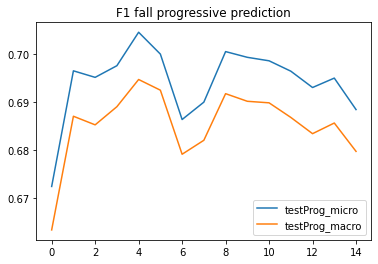

In [ ]:
%matplotlib inline
plt.plot(np.array(pp).T[0].T,label="testProg_micro")
plt.plot(np.array(pp).T[1].T,label="testProg_macro")
plt.title('F1 fall progressive prediction')
plt.legend()
plt.show()

In [ ]:
# Statistical significance

from scipy.stats import ttest_ind,ttest_rel,ks_2samp
ttest_ind(predsAr[6].reshape(-1), predsAr[7].reshape(-1))

Ttest_indResult(statistic=-0.060308974604006006, pvalue=0.9519098803494104)

In [ ]:
# Seperating the model predictions to change the dimensions to (4 * days X 77) from (77 * days X 4)

np.array(predsAr[8])
a = []
b = []
i =0
ar = []
br= []
for x,y in zip(predsAr[8],trues):
  a.append(x)
  b.append(y)
  i+=1
  if i%77==0:
    ar.extend(list(np.array(a).T))
    br.extend(list(np.array(b).T))
    a = []
    b = []

br = np.array(br)
ar = np.array(ar)

from sklearn.utils.multiclass import type_of_target
type_of_target(br)
type_of_target(ar)
print(classification_report(np.hstack(br),np.hstack(ar)))
#print(classification_report(y_true=br,y_pred=ar))

              precision    recall  f1-score   support

           0       0.97      0.01      0.03      2235
           1       0.30      1.00      0.46      1373
           2       0.00      0.00      0.00       568
           3       0.00      0.00      0.00       254
           4       0.00      0.00      0.00       105
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1

    accuracy                           0.30      4620
   macro avg       0.09      0.07      0.03      4620
weighted avg       0.56      0.30      0.15      4620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predsAr[7].reshape(-1))

(4620, 4)

In [ ]:
trues.shape

(1155, 4)

In [ ]:
# Classification scores based on crime categories 

target_names = ['robery','burgalry','felony','grand']
#target_names = ['class 0(robery)', 'class 1(burgalry)', 'class 2(felony)','class 3(grand)']
from sklearn.utils.multiclass import type_of_target
#type_of_target(trues)
#type_of_target(predsAr[8])

#print(classification_report(np.hstack(predsAr[8]),np.hstack(trues)))

#print(classification_report(y_true=trues,y_pred=predsAr[8],target_names=target_names))

ValueError: ignored

In [ ]:
print("trues =",trues)
trues.shape

trues = [[0 0 0 1]
 [0 1 1 1]
 [1 3 1 0]
 ...
 [1 0 0 1]
 [1 0 0 1]
 [1 0 0 0]]


(1155, 4)

In [ ]:
print("predsAr[8] =",predsAr[8])
predsAr[8].shape

predsAr[8] = [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [0 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


(4620, 4)

In [ ]:
print("br =",br)
br.shape

br = [[0 0 1 ... 0 1 0]
 [0 1 3 ... 0 2 0]
 [0 1 1 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 2 0 ... 1 1 0]]


(60, 77)

In [ ]:
print("ar =",ar)
ar.shape

ar = [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


(60, 77)